# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [60]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

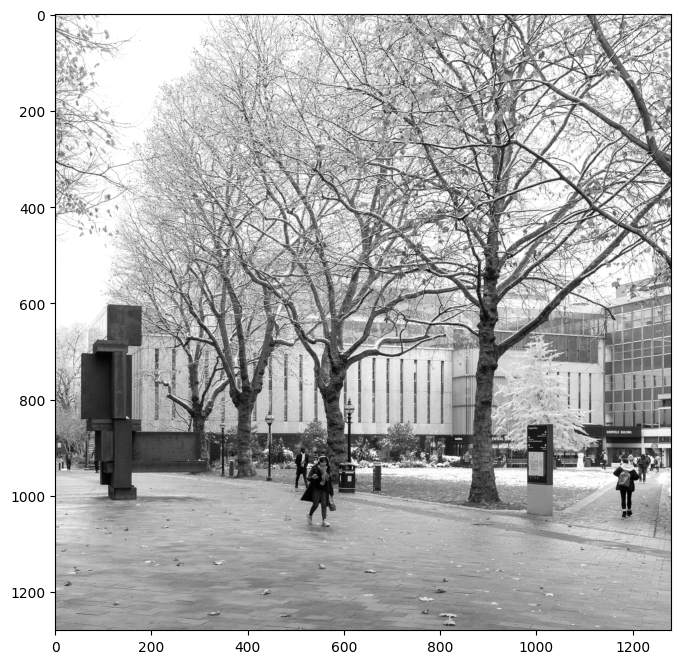

In [61]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

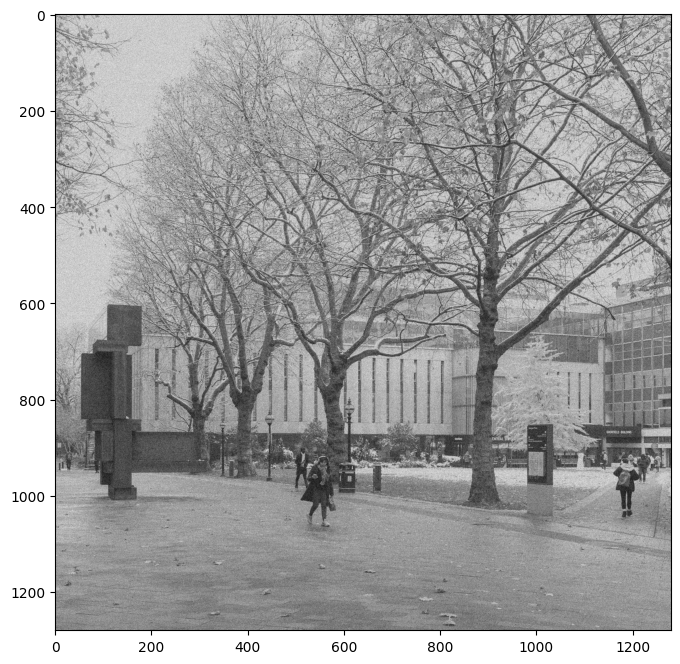

In [62]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


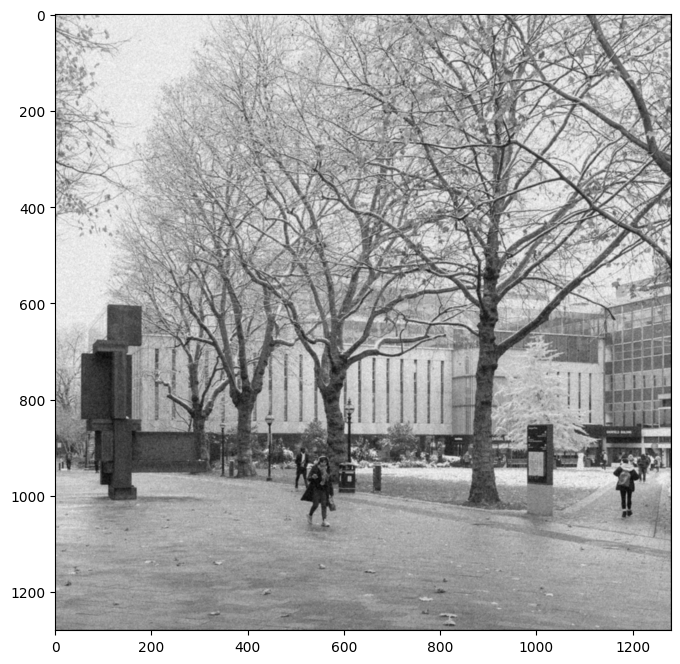

In [63]:
# Design the filter h
### Insert your code ###

k = 3
h = np.full((k, k), 1/(k*k))


# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###

# using same mode to keep the same size of the image:
moving_avg_3x3 = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(moving_avg_3x3, cmap='gray')

plt.gcf().set_size_inches(8, 8)


### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

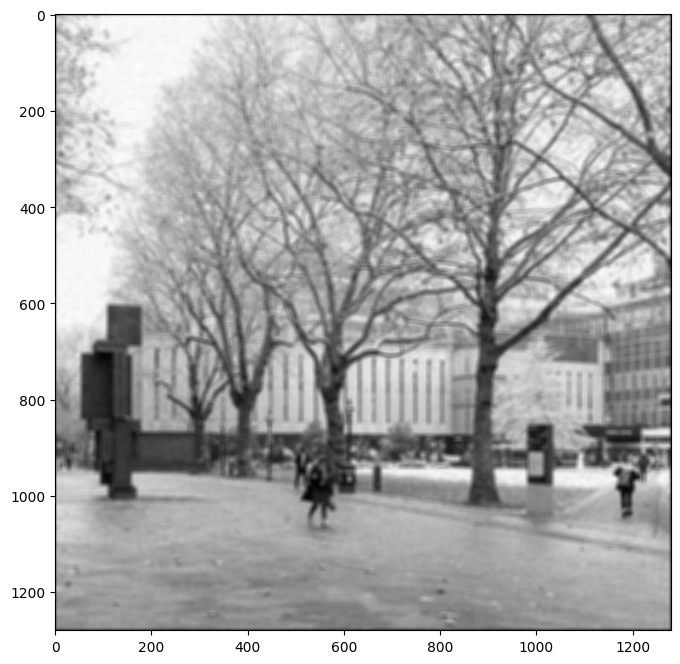

In [64]:
# Design the filter h
### Insert your code ###
k = 11
h = np.full((k, k), 1/(k*k))

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
moving_avg_11x11 = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(moving_avg_11x11, cmap='gray')
plt.gcf().set_size_inches(8, 8)

# mean squared error between moving_avg_3x3 and original
mse_3x3 = np.mean((moving_avg_3x3 - image) ** 2)
mse_11x11 = np.mean((moving_avg_11x11 - image) ** 2)

print('\n')
print('MSE between moving_avg_3x3 and image: ', mse_3x3)
print('MSE between moving_avg_11x11 and image: ', mse_11x11)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

### Insert your answer ###

The moving average filters are very good at removing the random Gaussian noise. The impact of the affected pixels is reduced as the moving average aims to correct said pixels by using the correct neighbouring values to move towards an image that is more representative of reality. As the noise is random, clusters of noisy pixels are less likely, and therefore less likely to affect the moving average filter.

The 3x3 kernel size performs better than the 11x11 kernel size with this image. While both achieve a smoother image (important for edge detection and finite derivative calculation later), the 11x11 kernel blurs the image too much. This is due to an average of too many neighbouring pixels being used to calculate the average, therefore removing important local minima/maxima for pixel colours. We lose quality / information with too large of a kernel size, whereas the 3x3 kernel does a good job of removing noise while still retaining important pixel information.

Set the mode parameter to 'same' to output the same size, using the default padding value of 0.

https://ai.stackexchange.com/questions/27779/what-is-the-difference-between-same-convolution-and-full-convolution-in-terms-of


The MSE of the 3x3 moving average filter (~520) is more than a factor of two lower than the MSE of the 11x11 moving average filter (~1325), showing us that the 3x3 filter does a better job at removing noise while retaining as much image quality as possible.


## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


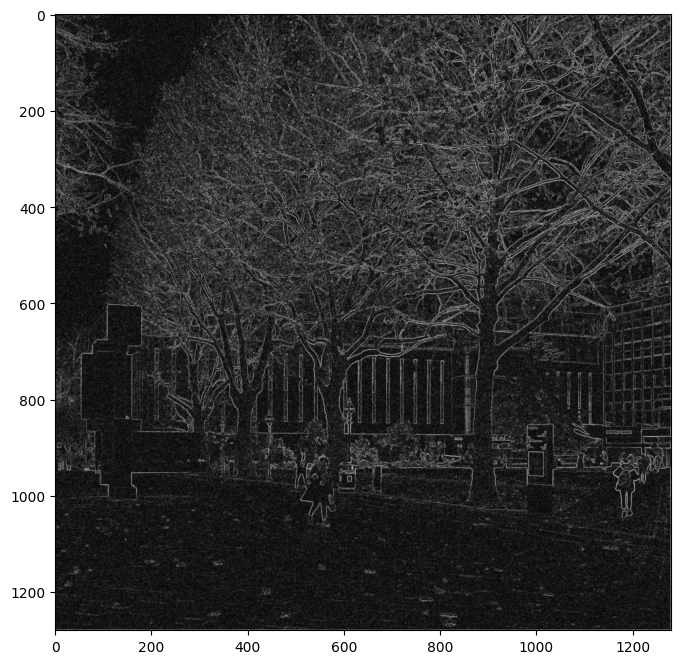

In [65]:
# Design the filters
### Insert your code ###

sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Image filtering
image_x = scipy.signal.convolve2d(image_noisy, sobel_x, mode='same')
image_y = scipy.signal.convolve2d(image_noisy, sobel_y, mode='same')

# Calculate the gradient magnitude
### Insert your code ###

grad_mag = np.hypot(image_x, image_y)

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

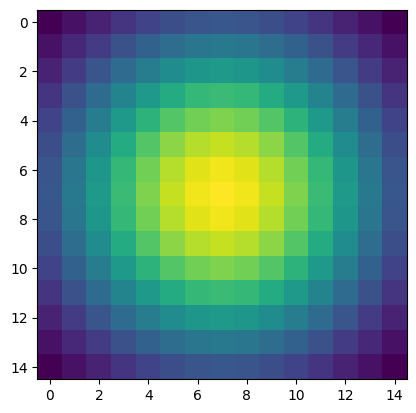

In [66]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma, size=3):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel

    # as the support is infinite, we can set a reasonable default value for size

    h = np.zeros((size, size))

    # calculate the values
    for i in range(size):
        for j in range(size):

            # offset_weight = i^2 + j^2, where i and j are the offset from the center of the kernel
            offset_weight = (i - size // 2) ** 2 + (j - size // 2) ** 2
            
            h[i, j] =  np.exp(-offset_weight / (2 * sigma ** 2)) / (2 * np.pi * sigma ** 2)
            
    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma, 15)
plt.imshow(h)

### Extra: Finding optimum kernel size for Gaussian smoothing for this image when $\sigma$ = 5 pixels.

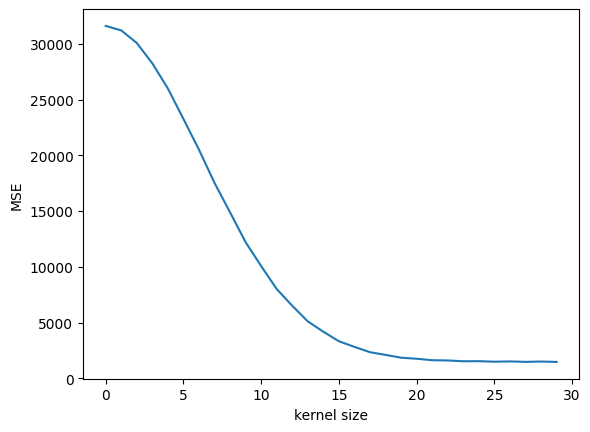

In [67]:
mses = np.zeros(30)

for i in range(30):
        h = gaussian_filter_2d(5, i)
        image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
        mse = np.mean((image_filtered - image) ** 2)
        mses[i] = mse

plt.xlabel('kernel size')
plt.ylabel('MSE')
plt.plot(mses)


We can see from above that a kernel size of around 15 is optimal, as the MSE does not decrease significantly after this point, so there is no need for the increased computation the increase of kernel size brings after this point

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Average time elapsed (seconds):  5.38323323726654


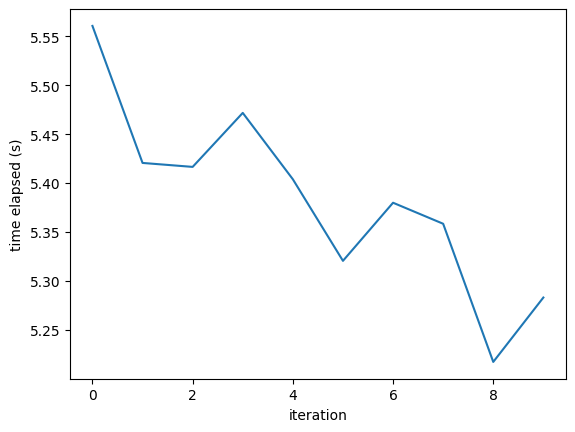

In [68]:
# Construct the Gaussian filter
### Insert your code ###

# Perform Gaussian smoothing and count time
### Insert your code ###

h = gaussian_filter_2d(5, 15)

times = []
for i in range(10):
        start = time.time()
        image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
        end = time.time()

        times.append(end - start)

print('Average time elapsed (seconds): ', np.mean(times))

plt.xlabel('iteration')
plt.ylabel('time elapsed (s)')
plt.plot(times)


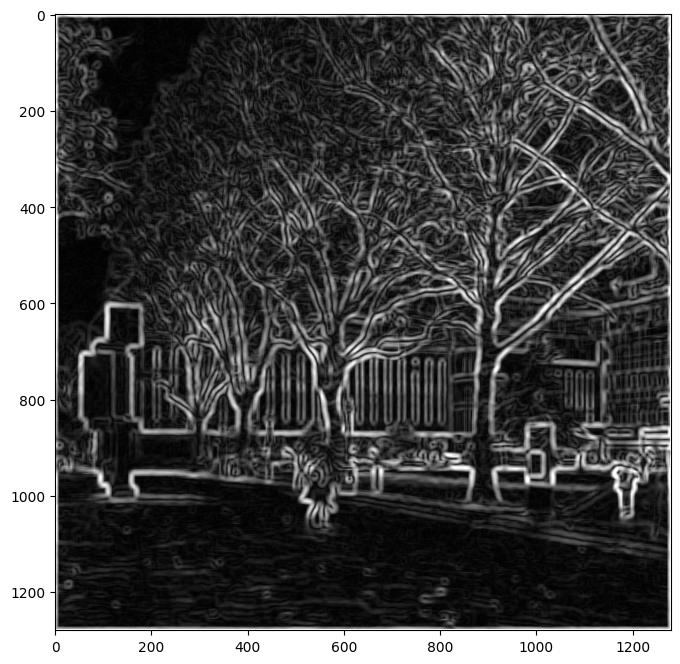

In [69]:
# Image filtering
### Insert your code ###

sobel_x_filtered = scipy.signal.convolve2d(image_filtered, sobel_x, mode='same')
sobel_y_filtered = scipy.signal.convolve2d(image_filtered, sobel_y, mode='same')

# Calculate the gradient magnitude
### Insert your code ###

grad_mag = np.hypot(sobel_x_filtered, sobel_y_filtered)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

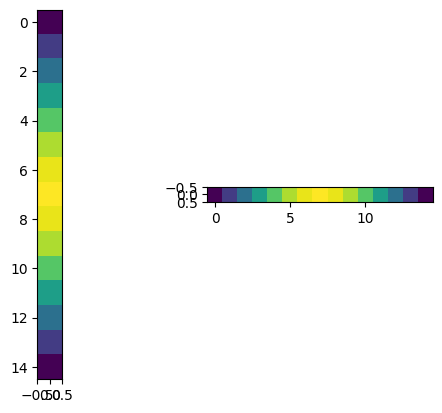

In [70]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma, size=3):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel

    # as the support is infinite, we can set a reasonable value for size
    h = np.zeros((size, 1))

    # calculate the values
    for i in range(size):
        offset_weight = (i - size // 2) ** 2
        h[i] = np.exp(-offset_weight / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma)
    
    return h

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x = gaussian_filter_1d(sigma, 15)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = gaussian_filter_1d(sigma, 15).T


# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Average time elapsed (seconds):  1.3215634107589722


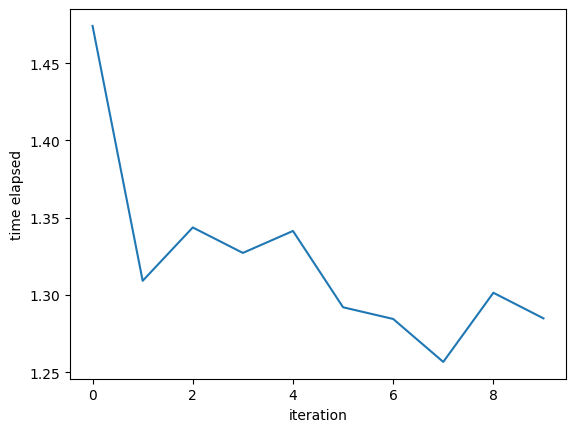

In [71]:
# Perform separable Gaussian smoothing and count time
### Insert your code ###

times = []

for i in range(10):
        start = time.time()
        image_filtered = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
        image_filtered = scipy.signal.convolve2d(image_filtered, h_y, mode='same')
        end = time.time()
        times.append(end - start)

print('Average time elapsed (seconds): ', np.mean(times))

plt.xlabel('iteration')
plt.ylabel('time elapsed')
plt.plot(times)

Mean difference between both gradient magnitude maps:  1.5311893268247638e-13


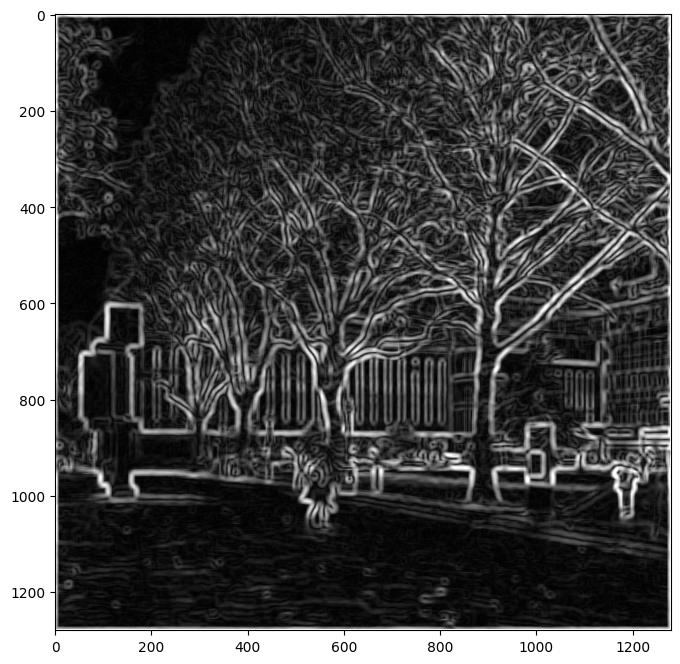

In [72]:

# Image filtering
### Insert your code ###

sobel_x_filtered = scipy.signal.convolve2d(image_filtered, sobel_x, mode='same')
sobel_y_filtered = scipy.signal.convolve2d(image_filtered, sobel_y, mode='same')

# Calculate the gradient magnitude
### Insert your code ###
grad_mag2 = np.hypot(sobel_x_filtered, sobel_y_filtered)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
### Insert your code ###

mean_diff = np.mean(np.abs(grad_mag - grad_mag2))
print("Mean difference between both gradient magnitude maps: ", mean_diff)


### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

### Insert your answer ###

Through the experiments above, we have found that the optimum kernel size for Gaussian smoothing is 15x15 for this image for reasons explained above. When paired with Sobel filtering, we can see that it detects lines at a good granularity. The trees, statue and buildings, as well as any other larger objects are correctly outlined, but the edges of smaller objects are not detected. To detect these edges, we can reduce the kernel size for Gaussian smoothing, as well as vary the sigma parameter to control how far we want to smooth. Smoothing is important, as it allows for easier calculation of the finite derivatives when applying the Sobel filter.

We can see using a convolution of the two 1D Gaussian smoothing kernels (~1.3s on average) is quicker than using a 2D Gaussian smoothing kernel (~5.3s on average) by just over a factor of three. This is because we avoid redundant multiplications and additions performed in the 2D Gaussian smoothing when using a convolution of the 1D Gaussian smoothing kernels, and drastically reduce the time complexity as a result.

The two images produced by the two methods have a mean difference of around 1.5^-13, which is likely due to floating point errors. This shows that the two methods produce the same output, with a negligible systematic error.


## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [73]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [74]:
# Expand the dimension of the numpy array
### Insert your code ###

image_noisy = image_noisy[np.newaxis, np.newaxis, :, :]


# Convert to a Pytorch tensor using torch.from_numpy
### Insert your code ###

image_noisy = torch.from_numpy(image_noisy)


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

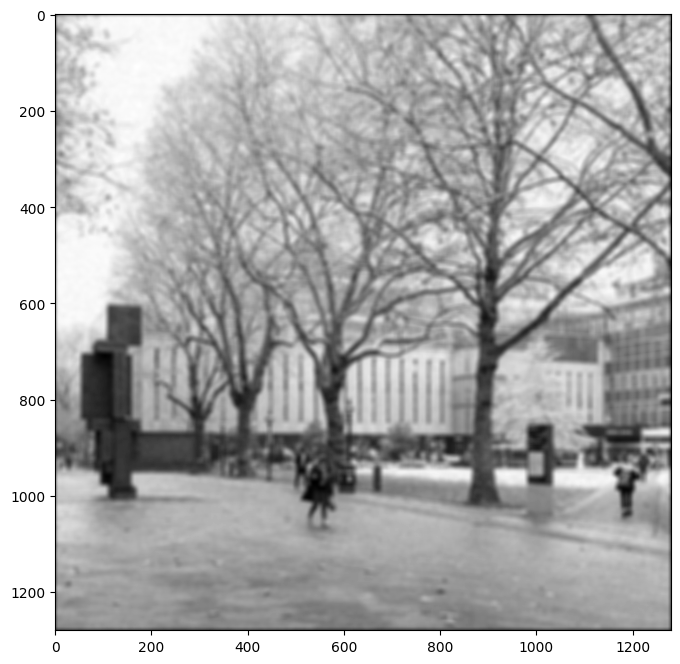

In [75]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
size = 15
h = gaussian_filter_2d(sigma, size)

# Create the Conv2D filter
### Insert your code ###

filter = torch.nn.Conv2d(1, 1, kernel_size=size, padding='same', bias=False)
filter.weight = torch.nn.Parameter(torch.from_numpy(h[np.newaxis, np.newaxis, :, :]))

# Filtering
### Insert your code ###

image_filtered = filter(image_noisy)

# Convert the Pytorch tensor to a numpy array
image_filtered_np = np.squeeze(image_filtered.detach().numpy())

# Display the filtering result (provided)
plt.imshow(image_filtered_np, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

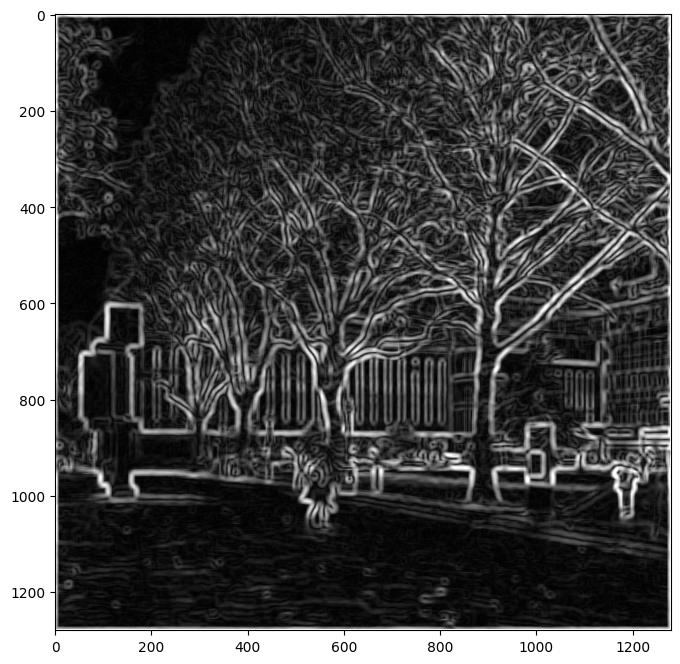

In [76]:
# Create Conv2D filters
### Insert your code ###

filter_x = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
filter_x.weight = torch.nn.Parameter(torch.from_numpy(sobel_x[np.newaxis, np.newaxis, :, :]).type(torch.DoubleTensor))

filter_y = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
filter_y.weight = torch.nn.Parameter(torch.from_numpy(sobel_y[np.newaxis, np.newaxis, :, :]).type(torch.DoubleTensor))

# Perform filtering
### Insert your code ###

image_x_filtered = filter_x(image_filtered)
image_y_filtered = filter_y(image_filtered)

# Calculate the gradient magnitude map

image_x_filtered = np.squeeze(image_x_filtered.detach().numpy())
image_y_filtered = np.squeeze(image_y_filtered.detach().numpy())

grad_mag3 = np.hypot(image_x_filtered, image_y_filtered)

### Insert your code ###

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

In [77]:
# Check the difference between the grad_mag2 and grad_mag3

mse = np.mean((grad_mag2 - grad_mag3) ** 2)
print("Mean squared error between grad_mag2 and grad_mag3: ", mse)

# Check the difference between the grad_mag1 and grad_mag3

mse = np.mean((grad_mag - grad_mag3) ** 2)
print("Mean squared error between grad_mag1 and grad_mag3: ", mse)




Mean squared error between grad_mag2 and grad_mag3:  4.0712718169720243e-26
Mean squared error between grad_mag1 and grad_mag3:  7.203234968513665e-26


We can see that PyTorch does in fact give us very similar results to SciPy, with some more very negligible systematic errors.